# Data Exploration

## Install dependencies

### Import Packages
Import the necessary packages that will be used in the exploration.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import calendar

### Data Loading
Load the SQLite data file into the notebook using pandas.

In [2]:
df = pd.read_sql_table('weather_traffic_fines', 'sqlite:///data/data.sqlite')

In [3]:
df.head(10)

,DATE,T2M,T2MDEW,QV2M,PRECTOTCORR,PS,WS10M,WD10M,TRAFFIC OFFENCE FREQUENCIES
0,2022-01-01,8.74,8.08,6.90,0.11,97.96,5.12,218.75,199
1,2022-01-02,7.61,6.01,6.04,1.96,97.11,7.83,227.38,162
2,2022-01-03,7.15,6.08,6.04,5.73,96.67,7.70,241.56,297
3,2022-01-04,4.27,3.70,5.25,15.48,95.43,3.80,256.81,255
4,2022-01-05,0.80,0.01,3.97,2.29,96.24,7.89,281.19,401
5,2022-01-06,0.20,-0.36,3.85,0.32,97.32,4.28,263.19,357
6,2022-01-07,0.37,-0.52,3.78,6.90,96.75,6.46,215.94,402
7,2022-01-08,0.45,-0.26,3.91,4.39,96.06,7.25,228.94,198
8,2022-01-09,0.87,0.36,4.09,5.28,95.61,6.73,266.06,192
9,2022-01-10,-0.57,-2.20,3.30,0.05,97.64,1.43,207.75,449


In [4]:
df.tail(10)

,DATE,T2M,T2MDEW,QV2M,PRECTOTCORR,PS,WS10M,WD10M,TRAFFIC OFFENCE FREQUENCIES
355,2022-12-22,7.00,6.61,6.35,12.76,96.12,6.03,230.62,577
356,2022-12-23,7.77,7.26,6.65,12.91,96.09,7.05,243.88,425
357,2022-12-24,7.26,6.59,6.29,1.27,96.93,5.62,240.88,430
358,2022-12-25,7.08,6.67,6.35,3.50,96.89,5.95,196.94,441
359,2022-12-26,6.27,5.44,5.86,3.68,97.16,6.94,250.56,445
360,2022-12-27,2.57,1.93,4.46,0.21,97.96,6.59,224.94,443
361,2022-12-28,5.58,4.76,5.55,2.14,96.82,9.41,210.94,431
362,2022-12-29,6.99,5.48,5.86,1.76,96.29,9.45,229.25,444
363,2022-12-30,6.34,5.72,6.04,3.79,96.43,8.83,202.94,391
364,2022-12-31,11.63,9.82,7.87,1.11,96.67,11.03,218.12,415


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DATE                         365 non-null    datetime64[ns]
 1   T2M                          365 non-null    float64       
 2   T2MDEW                       365 non-null    float64       
 3   QV2M                         365 non-null    float64       
 4   PRECTOTCORR                  365 non-null    float64       
 5   PS                           365 non-null    float64       
 6   WS10M                        365 non-null    float64       
 7   WD10M                        365 non-null    float64       
 8   TRAFFIC OFFENCE FREQUENCIES  365 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 25.8 KB


### Data Visualization

A Boxplot is created to get the visual summary of the variability of values in a dataset to show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset.

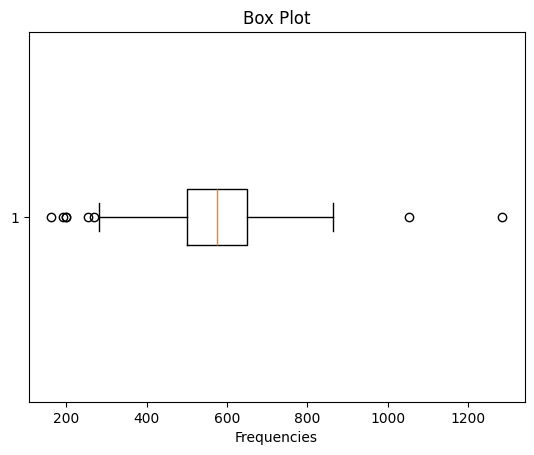

Box Plot Information: 
Minimum: 280.0
First Quartile (Q1): 500.0
Median: 574.0
Third Quartile (Q3): 651.0
Maximum: 864.0


In [6]:
# Create a box plot
box = plt.boxplot(df['TRAFFIC OFFENCE FREQUENCIES'], vert=False)

# Set labels and title
plt.xlabel('Frequencies')
plt.title('Box Plot')

# Display the plot
plt.show()

# Calculate the statistics for the box plot
statistics = {
    'min': np.min(box['whiskers'][0].get_data()[0]),
    'q1': np.percentile(box['boxes'][0].get_data()[0], 25),
    'median': np.median(box['medians'][0].get_data()[0]),
    'q3': np.percentile(box['boxes'][0].get_data()[0], 75),
    'max': np.max(box['whiskers'][1].get_data()[0])
}

# Print the information
print("Box Plot Information: ")
print(f"Minimum: {statistics['min']}")
print(f"First Quartile (Q1): {statistics['q1']}")
print(f"Median: {statistics['median']}")
print(f"Third Quartile (Q3): {statistics['q3']}")
print(f"Maximum: {statistics['max']}")

The trend of traffic fine frequencies each day over the year 2022 is observed from the following line chart.

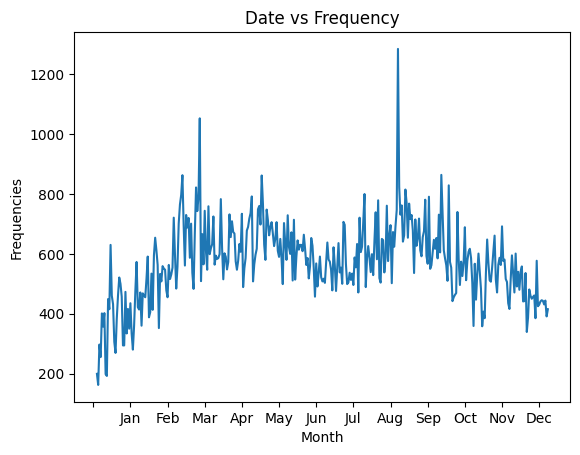

In [7]:
# Frequencies of traffic fines each day over the year.
plt.plot(df['DATE'], df['TRAFFIC OFFENCE FREQUENCIES'])
plt.xlabel('Month')
plt.ylabel('Frequencies')
plt.title('Date vs Frequency')
plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)
plt.show()

The count of traffic violations exhibits a rising pattern from July to September.

More insights are observed from the following bar chart.  

[11317 13918 20503 18644 20639 17987 17187 19531 20913 18428 15700 14603]


Text(0.5, 1.0, 'Date vs Frequency')

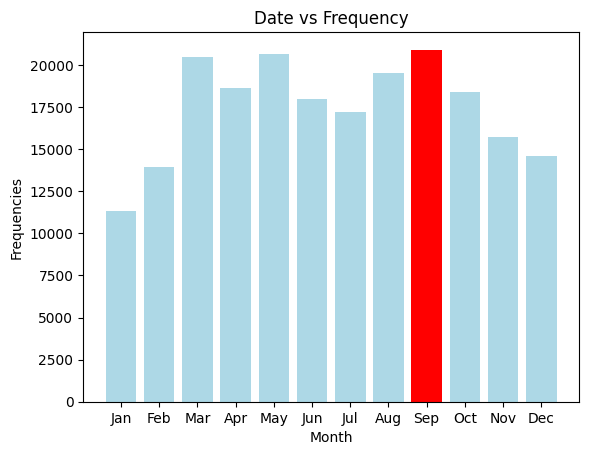

In [20]:
# Group the data by month and sum the frequencies

df_monthly = df.groupby(df['DATE'].dt.month)['TRAFFIC OFFENCE FREQUENCIES'].sum()
df_month_names = df.groupby(df['DATE'].dt.month)['DATE']
month_names = [calendar.month_name[i][:3] for i in df_monthly.index]
print(df_monthly.values)
color = ['lightblue' if (x < max(df_monthly.values)) else 'red' for x in df_monthly.values ]
plt.bar(month_names, df_monthly.values, color=color)
plt.xlabel('Month')
plt.ylabel('Frequencies')
plt.title('Date vs Frequency')

In the month of September, the highest number of instances was observed.

The bar charts presented below depict the frequency of events on a quarterly basis.

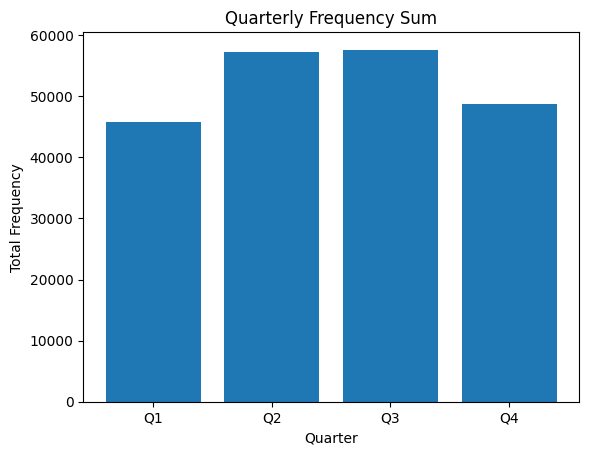

In [23]:
# Group the data by quarter and sum the frequencies
df_quarterly = df.resample('Q', on='DATE')['TRAFFIC OFFENCE FREQUENCIES'].sum()

# Get the quarter labels
quarter_labels = [f'Q{i+1}' for i in range(len(df_quarterly))]

# Plot the data as a bar chart
plt.bar(quarter_labels, df_quarterly)
plt.xlabel('Quarter')
plt.ylabel('Total Frequency')
plt.title('Quarterly Frequency Sum')

plt.show()

As anticipated based on the previous data, the third quarter stands out with the highest number of incidents.

The following chart illustrates the temperature data throughout the year. 

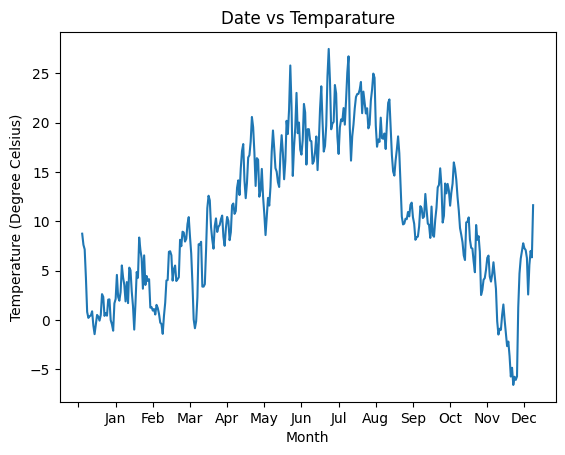

In [24]:
plt.plot(df['DATE'], df['T2M'])

plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)

plt.xlabel('Month')
plt.ylabel('Temperature (Degree Celsius)')
plt.title('Date vs Temparature')
plt.show()

Overall, the third quarter experiences the highest temperature.

The below chart displays the Dew/Frost point information for the entire year.


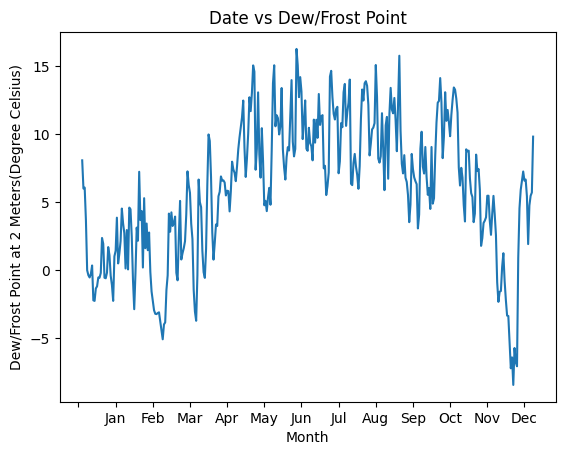

In [30]:
plt.plot(df['DATE'], df['T2MDEW'])

plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)

plt.xlabel('Month')
plt.ylabel('Dew/Frost Point at 2 Meters(Degree Celsius)')
plt.title('Date vs Dew/Frost Point')
plt.show()

The Dew/Frost point flactuated entire year.

The below chart displays the Specific Humidity information for the entire year.

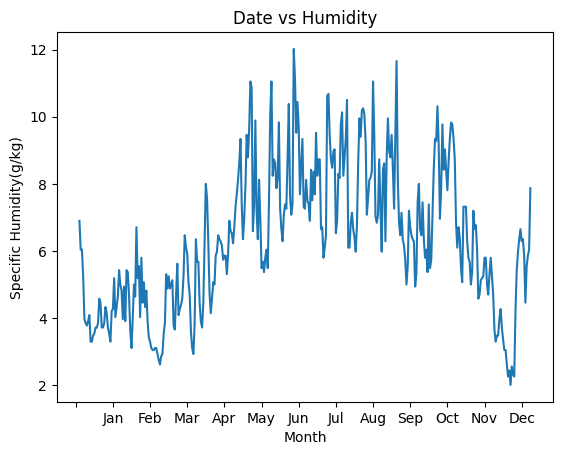

In [31]:
plt.plot(df['DATE'], df['QV2M'])

plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)

plt.xlabel('Month')
plt.ylabel('Specific Humidity(g/kg)')
plt.title('Date vs Humidity')
plt.show()

The Specific Humidity at 2 Meters (g/kg) was increased second and third quarter.

The below chart displays the precipitation information for the entire year.

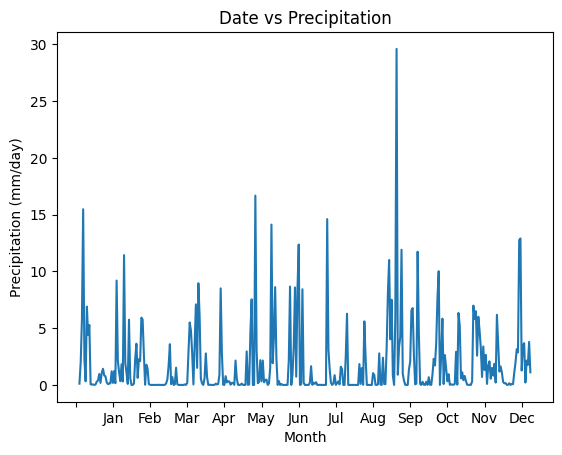

In [25]:
plt.plot(df['DATE'], df['PRECTOTCORR'])

plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)

plt.xlabel('Month')
plt.ylabel('Precipitation (mm/day)')
plt.title('Date vs Precipitation')
plt.show()

Regular precipitation was recorded at the beginning and end of the year. However, there was intermittent rain in the September.

The below chart provides insights into the Surface Pressure throughout the year.

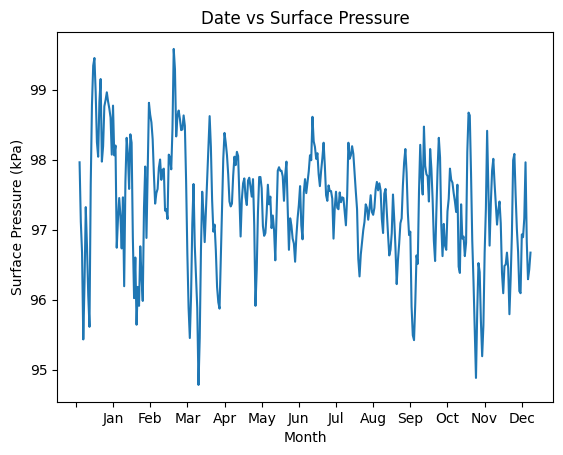

In [33]:
plt.plot(df['DATE'], df['PS'])

plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)

plt.xlabel('Month')
plt.ylabel('Surface Pressure (kPa)')
plt.title('Date vs Surface Pressure')
plt.show()

Surface Pressure is flactuated throughout the year but the range is very small.

The below chart provides insights into the wind speed throughout the year.

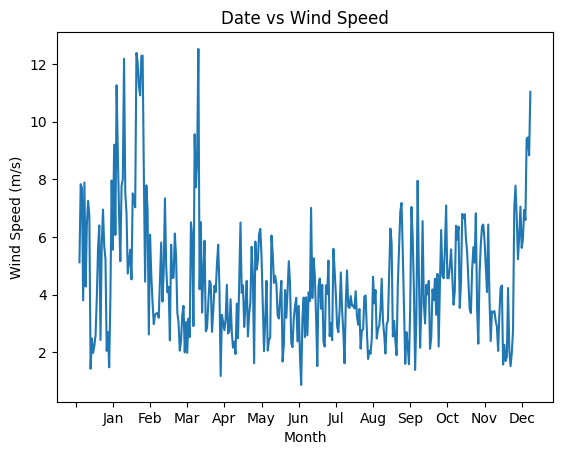

In [26]:
plt.plot(df['DATE'], df['WS10M'])
plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('Date vs Wind Speed')
plt.show()

The wind speed observed during the first quarter was greater compared to the rest of the year.

The below chart provides insights into the wind direction throughout the year.

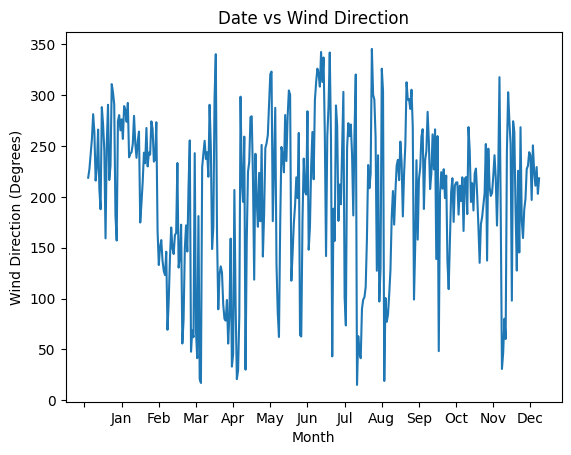

In [34]:
plt.plot(df['DATE'], df['WD10M'])
plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)
plt.xlabel('Month')
plt.ylabel('Wind Direction (Degrees)')
plt.title('Date vs Wind Direction')
plt.show()

Wind Direction is flactuated throughout the year.


### Correlation Analysis
To get the correlation between the frequencies of traffic fines and weather data, the following charts are created by combining the above charts. Since surface pressure and wind direction is flactuate throughout the year these have not much impact on traffic offence that is why they are not included in further analysis.

In [35]:
def normalize(s):
    # Perform min-max normalization
    # Normalize to range [0, 1]
    normalized_s = (s - s.min()) / (s.max() - s.min())
    return normalized_s

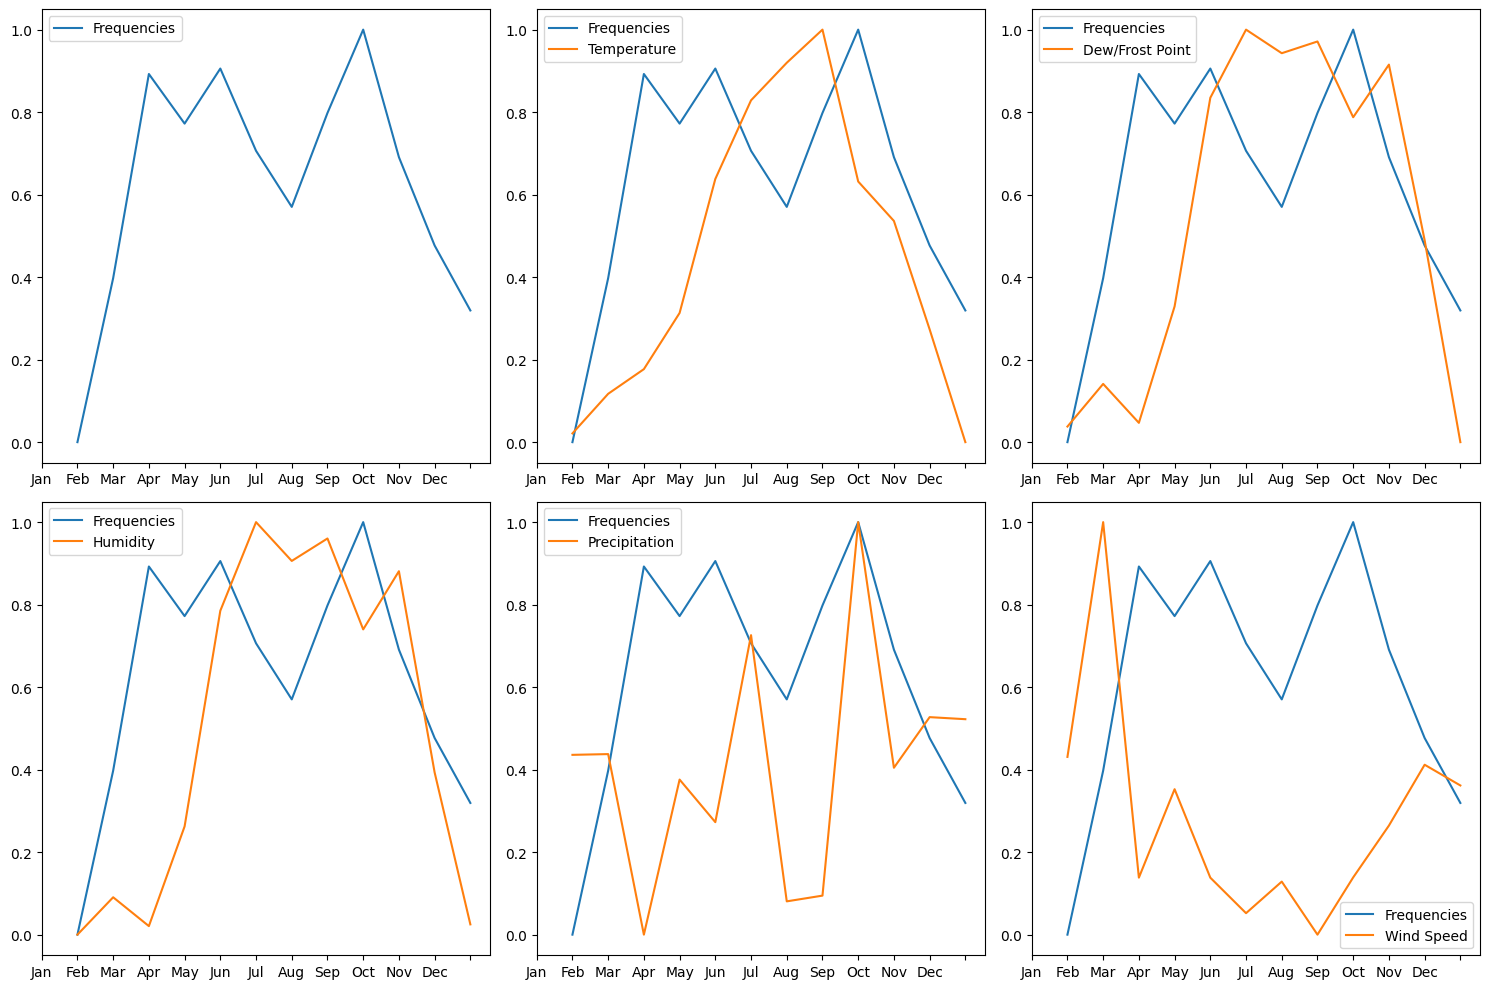

In [39]:
# Group the data by month
# Get the mean of the frequencies, temperature, precipitation and wind speed
# Normalize the data in range 0 and 1
df_monthly_f = normalize(df.groupby(df['DATE'].dt.month)['TRAFFIC OFFENCE FREQUENCIES'].mean())
df_monthly_t = normalize(df.groupby(df['DATE'].dt.month)['T2M'].mean())
df_monthly_d = normalize(df.groupby(df['DATE'].dt.month)['T2MDEW'].mean())
df_monthly_q = normalize(df.groupby(df['DATE'].dt.month)['QV2M'].mean())
df_monthly_p = normalize(df.groupby(df['DATE'].dt.month)['PRECTOTCORR'].mean())
df_monthly_w = normalize(df.groupby(df['DATE'].dt.month)['WS10M'].mean())

month_names = [calendar.month_name[i][:3] for i in df_monthly.index]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot for Frequencies
axes[0][0].plot(df_monthly_f, label='Frequencies')
axes[0][0].legend()

# Plot for Temperature
axes[0][1].plot(df_monthly_f, label='Frequencies')
axes[0][1].plot(df_monthly_t, label='Temperature')
axes[0][1].legend()

# Plot for Dew/Frost Point
axes[0][2].plot(df_monthly_f, label='Frequencies')
axes[0][2].plot(df_monthly_d, label='Dew/Frost Point')
axes[0][2].legend()

# Plot for Humidity
axes[1][0].plot(df_monthly_f, label='Frequencies')
axes[1][0].plot(df_monthly_q, label='Humidity')
axes[1][0].legend()

# Plot for Precipitation
axes[1][1].plot(df_monthly_f, label='Frequencies')
axes[1][1].plot(df_monthly_p, label='Precipitation')
axes[1][1].legend()

# Plot for Wind Speed
axes[1][2].plot(df_monthly_f, label='Frequencies')
axes[1][2].plot(df_monthly_w, label='Wind Speed')
axes[1][2].legend()

# Set x-axis tick labels to month names
for ax_row in axes:
    for ax in ax_row:
        ax.set_xticks(range(len(month_names)))
        ax.set_xticklabels(month_names)

# Adjust the number of ticks based on max_ticks
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
for ax_row in axes:
    for ax in ax_row:
        ax.xaxis.set_major_locator(locator)
    
# Adjust spacing between subplots
plt.tight_layout()

plt.show()

### Conclusion
Correlations between traffic fine occurrences and weather data are found by exploring the datasets. The main takeaways are:
1. Occurances of speed limit exceeding by driving are higher in quantity in the first half period of the year.
2. These occurrences are reported highest in the 2nd quarter of the year.
3. Overall, the frequency of traffic fines correlates with the temperature. It increases with the temperature increase but after a limit it decrease with the temperature increase.
4. In terms of precipitation, more number of fines were incurred in the first half during high precipitation. Nevertheless, this trend fluctuates through the rest of the year. Therefore, It can be concluded that precipitation does not have much correlation with traffic fines.
5. Fines are incurred higher in number when the wind speed is lower and vice versa. In other words, there is a strong relation between the speed limit exceeding behavior with the wind speed.

In conclusion, the behavior of exceeding the speed limit has shown some correlation with the temperature and wind speed. However, precipitation does not have a valuable connection with traffic fines.

NOTE: This conclusion is only derived from the exploration of the data. There might be other factors such as variation in the number of authorities patrolling at a particular time, relaxed mode of authority, number of traffics on the road, impacting factors like vacation, etc which are not considered here.